<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding How The Data Is Distributed**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform Exploratory Data Analysis (EDA). You will examine the structure of the data, visualize key variables, and analyze trends related to developer experience, tools, job satisfaction, and other important aspects.


## Objectives


In this lab you will perform the following:


- Understand the structure of the dataset.

- Perform summary statistics and data visualization.

- Identify trends in developer experience, tools, job satisfaction, and other key variables.


### Install the required libraries


In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn


### Step 1: Import Libraries and Load Data


- Import the `pandas`, `matplotlib.pyplot`, and `seaborn` libraries.


- You will begin with loading the dataset. You can use the pyfetch method if working on JupyterLite. Otherwise, you can use pandas' read_csv() function directly on their local machines or cloud environments.


In [22]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Stack Overflow survey dataset
data_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
df = pd.read_csv(data_url)

# Display the first few rows of the dataset
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Step 2: Examine the Structure of the Data


- Display the column names, data types, and summary information to understand the data structure.

- Objective: Gain insights into the dataset's shape and available variables.


In [23]:
# Display column names, data types, and summary information
print("Dataset Info:")
df.info()

print("\nDataset Shape:")
print(df.shape)

print("\nColumn Names:")
print(df.columns.tolist())

print("\nSummary Statistics:")
df.describe()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65437 entries, 0 to 65436
Columns: 114 entries, ResponseId to JobSat
dtypes: float64(13), int64(1), object(100)
memory usage: 56.9+ MB

Dataset Shape:
(65437, 114)

Column Names:
['ResponseId', 'MainBranch', 'Age', 'Employment', 'RemoteWork', 'Check', 'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline', 'TechDoc', 'YearsCode', 'YearsCodePro', 'DevType', 'OrgSize', 'PurchaseInfluence', 'BuyNewTool', 'BuildvsBuy', 'TechEndorse', 'Country', 'Currency', 'CompTotal', 'LanguageHaveWorkedWith', 'LanguageWantToWorkWith', 'LanguageAdmired', 'DatabaseHaveWorkedWith', 'DatabaseWantToWorkWith', 'DatabaseAdmired', 'PlatformHaveWorkedWith', 'PlatformWantToWorkWith', 'PlatformAdmired', 'WebframeHaveWorkedWith', 'WebframeWantToWorkWith', 'WebframeAdmired', 'EmbeddedHaveWorkedWith', 'EmbeddedWantToWorkWith', 'EmbeddedAdmired', 'MiscTechHaveWorkedWith', 'MiscTechWantToWorkWith', 'MiscTechAdmired', 'ToolsTechHaveWorkedWith', 'Tools

,ResponseId,CompTotal,WorkExp,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,ConvertedCompYearly,JobSat
count,65437.000000,3.374000e+04,29658.000000,29324.000000,29393.000000,29411.000000,29450.000000,29448.00000,29456.000000,29456.000000,29450.000000,29445.000000,2.343500e+04,29126.000000
mean,32719.000000,2.963841e+145,11.466957,18.581094,7.522140,10.060857,24.343232,22.96522,20.278165,16.169432,10.955713,9.953948,8.615529e+04,6.935041
std,18890.179119,5.444117e+147,9.168709,25.966221,18.422661,21.833836,27.089360,27.01774,26.108110,24.845032,22.906263,21.775652,1.867570e+05,2.088259
min,1.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000e+00,0.000000
25%,16360.000000,6.000000e+04,4.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,3.271200e+04,6.000000
50%,32719.000000,1.100000e+05,9.000000,10.000000,0.000000,0.000000,20.000000,15.00000,10.000000,5.000000,0.000000,0.000000,6.500000e+04,7.000000
75%,49078.000000,2.500000e+05,16.000000,22.000000,5.000000,10.000000,30.000000,30.00000,25.000000,20.000000,10.000000,10.000000,1.079715e+05,8.000000
max,65437.000000,1.000000e+150,50.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,1.625660e+07,10.000000


### Step 3: Handle Missing Data


- Identify missing values in the dataset.

- Impute or remove missing values as necessary to ensure data completeness.



In [24]:
# Check missing data
print("Missing values per column:")
missing_summary = pd.DataFrame({
    'Column': df.columns,
    'Missing_Count': df.isnull().sum().values,
    'Missing_Percent': (df.isnull().sum().values / len(df) * 100).round(2)
})
print(missing_summary[missing_summary['Missing_Count'] > 0])

# DON'T drop all rows - instead, drop only rows with missing key columns
key_columns = ['Employment', 'JobSat', 'YearsCodePro', 'EdLevel']

# Check which key columns exist
existing_key_cols = [col for col in key_columns if col in df.columns]
print(f"\nKey columns found: {existing_key_cols}")

# Drop rows ONLY if key columns have missing values
df_cleaned = df.dropna(subset=existing_key_cols)

print(f"\n✓ Original shape: {df.shape}")
print(f"✓ Cleaned shape: {df_cleaned.shape}")
print(f"✓ Rows retained: {(len(df_cleaned)/len(df)*100):.1f}%")


Missing values per column:
                  Column  Missing_Count  Missing_Percent
4             RemoteWork          10631            16.25
6       CodingActivities          10971            16.77
7                EdLevel           4653             7.11
8              LearnCode           4949             7.56
9        LearnCodeOnline          16200            24.76
..                   ...            ...              ...
109      JobSatPoints_11          35992            55.00
110         SurveyLength           9255            14.14
111           SurveyEase           9199            14.06
112  ConvertedCompYearly          42002            64.19
113               JobSat          36311            55.49

[109 rows x 3 columns]

Key columns found: ['Employment', 'JobSat', 'YearsCodePro', 'EdLevel']

✓ Original shape: (65437, 114)
✓ Cleaned shape: (28356, 114)
✓ Rows retained: 43.3%


### Step 4: Analyze Key Columns


- Examine key columns such as `Employment`, `JobSat` (Job Satisfaction), and `YearsCodePro` (Professional Coding Experience).

- **Instruction**: Calculate the value counts for each column to understand the distribution of responses.



In [25]:
# Examine key columns: Employment, JobSat, and YearsCodePro
print("Value Counts for Employment:")
print(df_cleaned['Employment'].value_counts())

print("\nValue Counts for JobSat:")
print(df_cleaned['JobSat'].value_counts())

print("\nValue Counts for YearsCodePro:")
print(df_cleaned['YearsCodePro'].value_counts())


Value Counts for Employment:
Employment
Employed, full-time                                                                                                               21903
Employed, full-time;Independent contractor, freelancer, or self-employed                                                           2231
Independent contractor, freelancer, or self-employed                                                                               1242
Employed, part-time                                                                                                                 531
Employed, full-time;Student, part-time                                                                                              488
                                                                                                                                  ...  
Employed, full-time;Not employed, but looking for work;Not employed, and not looking for work;Employed, part-time                     1
Student,

### Step 5: Visualize Job Satisfaction (Focus on JobSat)


- Create a pie chart or KDE plot to visualize the distribution of `JobSat`.

- Provide an interpretation of the plot, highlighting key trends in job satisfaction.


JobSat value counts (original df):
JobSat
NaN     36311
8.0      7509
7.0      6379
6.0      3751
9.0      3626
10.0     2251
5.0      1956
3.0      1165
4.0      1130
2.0       772
0.0       311
1.0       276
Name: count, dtype: int64

JobSat value counts (cleaned df):
JobSat
8.0     7325
7.0     6243
6.0     3651
9.0     3557
10.0    2196
5.0     1869
3.0     1141
4.0     1097
2.0      736
0.0      284
1.0      257
Name: count, dtype: int64


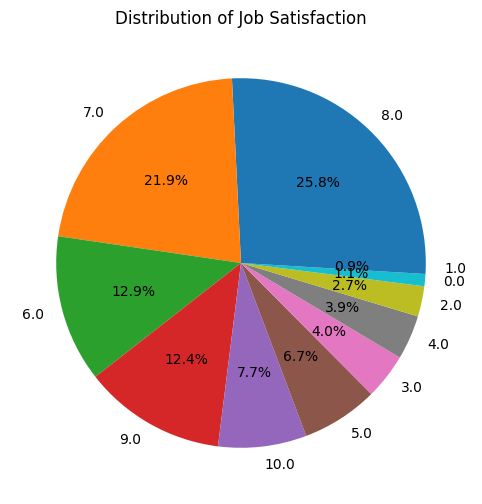

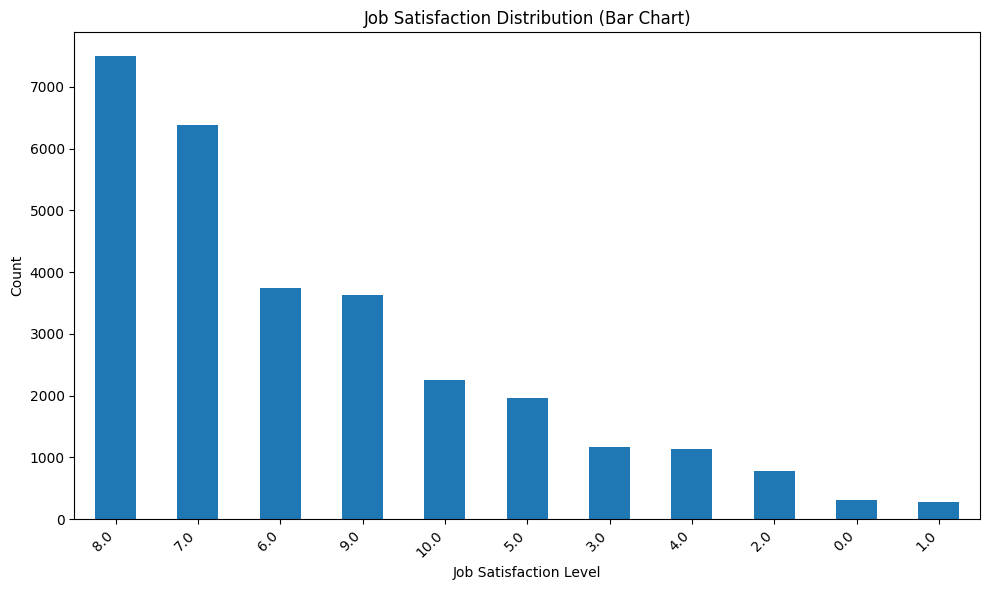

In [26]:
# Check JobSat distribution first
print("JobSat value counts (original df):")
print(df['JobSat'].value_counts(dropna=False))
print("\nJobSat value counts (cleaned df):")
print(df_cleaned['JobSat'].value_counts(dropna=False))

# Create pie chart using original df (exclude NaN values)
plt.figure(figsize=(10, 6))
job_sat_counts = df['JobSat'].value_counts(dropna=True)
job_sat_counts.plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Job Satisfaction')
plt.ylabel('')
plt.show()

# Bar plot as alternative (more informative)
plt.figure(figsize=(10, 6))
job_sat_counts.plot(kind='bar')
plt.title('Job Satisfaction Distribution (Bar Chart)')
plt.xlabel('Job Satisfaction Level')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Step 6: Programming Languages Analysis


- Compare the frequency of programming languages in `LanguageHaveWorkedWith` and `LanguageWantToWorkWith`.
  
- Visualize the overlap or differences using a Venn diagram or a grouped bar chart.


Dataset shapes for debugging:
Original df: (65437, 114)
Cleaned df: (28356, 114)

Top 10 Languages Developers Have Worked With:
LanguageHaveWorkedWith
JavaScript                 37492
HTML/CSS                   31816
Python                     30719
SQL                        30682
TypeScript                 23150
Bash/Shell (all shells)    20412
Java                       18239
C#                         16318
C++                        13827
C                          12184
Name: count, dtype: int64

Top 10 Languages Developers Want to Work With:
LanguageWantToWorkWith
Python                     25047
JavaScript                 23774
SQL                        22400
HTML/CSS                   20721
TypeScript                 20239
Rust                       17232
Go                         13837
Bash/Shell (all shells)    13744
C#                         12921
C++                        10873
Name: count, dtype: int64


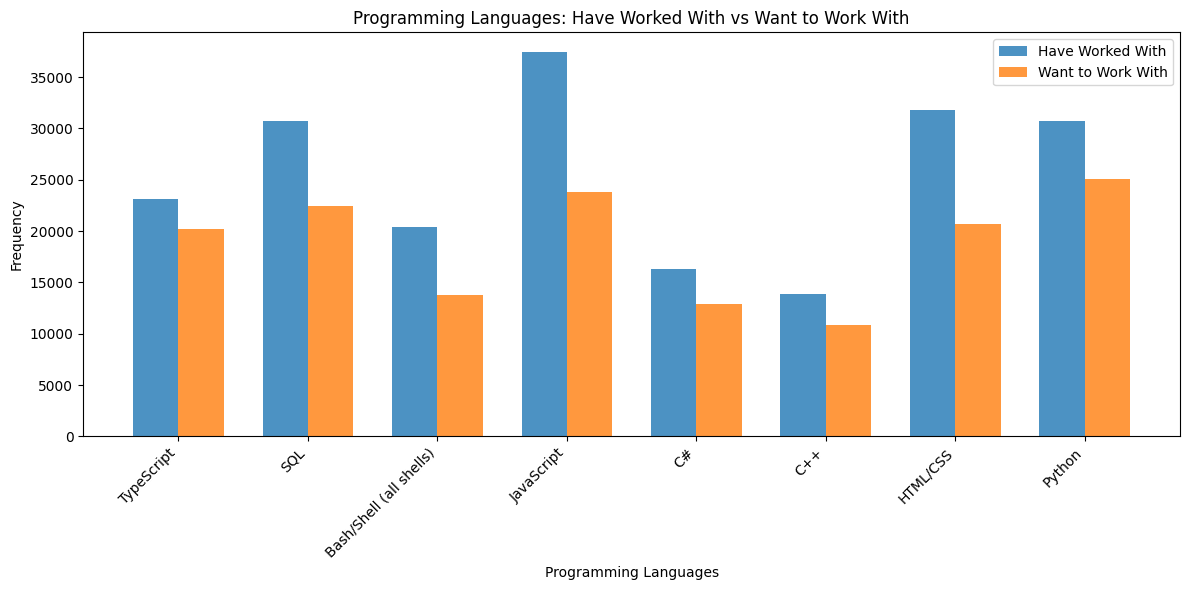

In [27]:
# Use original df and handle NaN values properly

print("Dataset shapes for debugging:")
print(f"Original df: {df.shape}")
print(f"Cleaned df: {df_cleaned.shape}")

# Use original df for language analysis (more robust)
df_lang = df.copy()

# For LanguageHaveWorkedWith
if 'LanguageHaveWorkedWith' in df_lang.columns:
    # Remove NaN and split semicolon-separated values
    languages_have = df_lang['LanguageHaveWorkedWith'].dropna().str.split(';').explode()
    lang_have_counts = languages_have.value_counts().head(10)
    print("\nTop 10 Languages Developers Have Worked With:")
    print(lang_have_counts)

# For LanguageWantToWorkWith  
if 'LanguageWantToWorkWith' in df_lang.columns:
    languages_want = df_lang['LanguageWantToWorkWith'].dropna().str.split(';').explode()
    lang_want_counts = languages_want.value_counts().head(10)
    print("\nTop 10 Languages Developers Want to Work With:")
    print(lang_want_counts)

# Check if we have data for both
if 'LanguageHaveWorkedWith' in df_lang.columns and 'LanguageWantToWorkWith' in df_lang.columns:
    # Get common top languages for fair comparison
    common_langs = list(set(lang_have_counts.index) & set(lang_want_counts.index))
    common_langs = common_langs[:10]  # Top 10 common
    
    if common_langs:
        have_common = lang_have_counts.reindex(common_langs, fill_value=0)
        want_common = lang_want_counts.reindex(common_langs, fill_value=0)
        
        # FIXED: Grouped bar chart with matching lengths
        fig, ax = plt.subplots(figsize=(12, 6))
        x = range(len(common_langs))
        width = 0.35
        
        ax.bar([i - width/2 for i in x], have_common.values, width, label='Have Worked With', alpha=0.8)
        ax.bar([i + width/2 for i in x], want_common.values, width, label='Want to Work With', alpha=0.8)
        
        ax.set_xlabel('Programming Languages')
        ax.set_ylabel('Frequency')
        ax.set_title('Programming Languages: Have Worked With vs Want to Work With')
        ax.set_xticks(x)
        ax.set_xticklabels(common_langs, rotation=45, ha='right')
        ax.legend()
        plt.tight_layout()
        plt.show()
    else:
        print("No common languages found between top 10 lists.")
        
        # Fallback: Individual bar plots
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
        
        lang_have_counts.head(10).plot(kind='bar', ax=ax1, alpha=0.8)
        ax1.set_title('Top Languages Worked With')
        ax1.tick_params(axis='x', rotation=45)
        
        lang_want_counts.head(10).plot(kind='bar', ax=ax2, alpha=0.8)
        ax2.set_title('Top Languages Want to Work With')
        ax2.tick_params(axis='x', rotation=45)
        
        plt.tight_layout()
        plt.show()
else:
    print("Required language columns not found in dataset.")


### Step 7: Analyze Remote Work Trends


- Visualize the distribution of RemoteWork by region using a grouped bar chart or heatmap.


Dataset shapes for debugging:
Original df shape: (65437, 114)
Cleaned df shape: (28356, 114)

RemoteWork column found!
RemoteWork Distribution (including NaN):
RemoteWork
Hybrid (some remote, some in-person)    23015
Remote                                  20831
In-person                               10960
NaN                                     10631
Name: count, dtype: int64

RemoteWork Distribution (excluding NaN):
RemoteWork
Hybrid (some remote, some in-person)    23015
Remote                                  20831
In-person                               10960
Name: count, dtype: int64


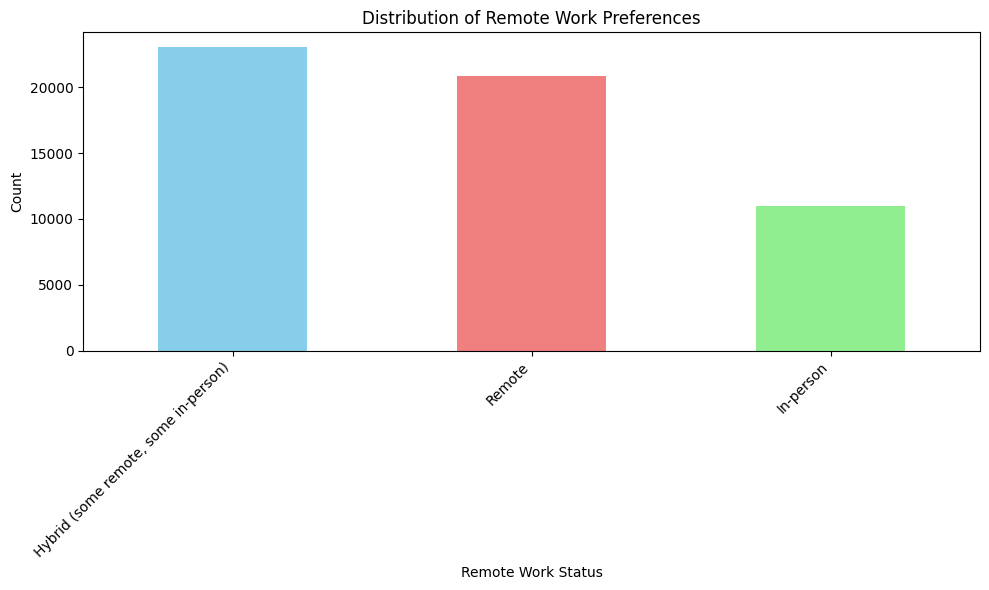

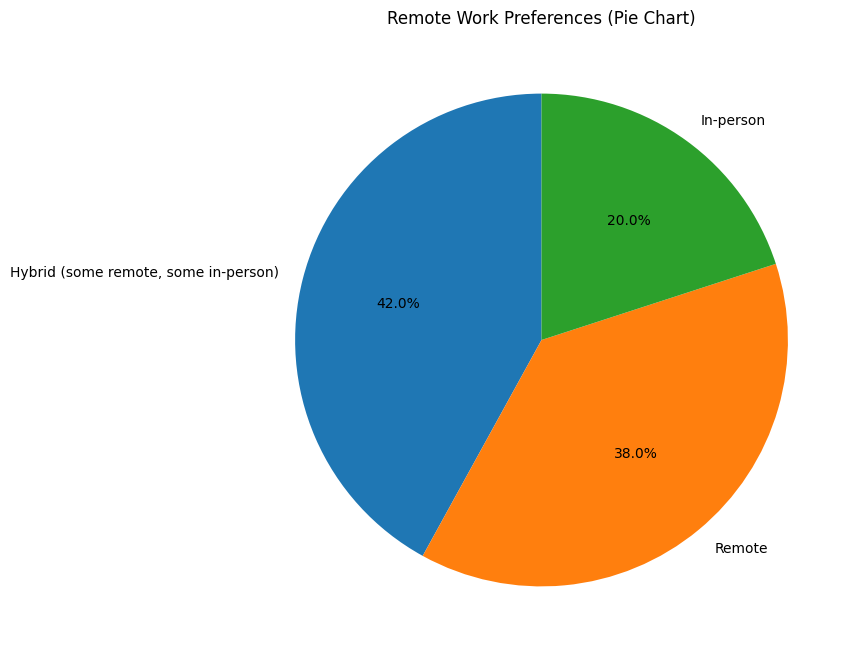

In [28]:
# Use original df and handle NaN values properly

print("Dataset shapes for debugging:")
print(f"Original df shape: {df.shape}")
print(f"Cleaned df shape: {df_cleaned.shape}")

# Use original df for remote work analysis
df_remote = df.copy()

# Check if RemoteWork column exists and get distribution
if 'RemoteWork' in df_remote.columns:
    print("\nRemoteWork column found!")
    print("RemoteWork Distribution (including NaN):")
    print(df_remote['RemoteWork'].value_counts(dropna=False))
    
    # Drop NaN for plotting
    remote_counts = df_remote['RemoteWork'].value_counts(dropna=True)
    print("\nRemoteWork Distribution (excluding NaN):")
    print(remote_counts)
    
    # Simple bar chart
    plt.figure(figsize=(10, 6))
    remote_counts.plot(kind='bar', color=['skyblue', 'lightcoral', 'lightgreen'])
    plt.title('Distribution of Remote Work Preferences')
    plt.xlabel('Remote Work Status')
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
    
    # Pie chart alternative
    if len(remote_counts) <= 5:  # Only if reasonable number of categories
        plt.figure(figsize=(8, 8))
        remote_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90)
        plt.title('Remote Work Preferences (Pie Chart)')
        plt.ylabel('')
        plt.show()
        
else:
    print("ERROR: 'RemoteWork' column not found in dataset.")
    print("Available columns containing 'remote' or 'work':")
    remote_cols = [col for col in df.columns if 'remote' in col.lower() or 'work' in col.lower()]
    print(remote_cols)

### Step 8: Correlation between Job Satisfaction and Experience


- Analyze the correlation between overall job satisfaction (`JobSat`) and `YearsCodePro`.
  
- Calculate the Pearson or Spearman correlation coefficient.


### Step 9: Cross-tabulation Analysis (Employment vs. Education Level)


- Analyze the relationship between employment status (`Employment`) and education level (`EdLevel`).

- **Instruction**: Create a cross-tabulation using `pd.crosstab()` and visualize it with a stacked bar plot if possible.


In [29]:
if 'Employment' in df_cleaned.columns and 'EdLevel' in df_cleaned.columns:
    # Create cross-tabulation
    crosstab = pd.crosstab(df_cleaned['Employment'], df_cleaned['EdLevel'])
    print("Cross-tabulation of Employment vs Education Level:")
    print(crosstab)

Cross-tabulation of Employment vs Education Level:
EdLevel                                             Associate degree (A.A., A.S., etc.)  \
Employment                                                                                
Employed, full-time                                                                 655   
Employed, full-time;Employed, part-time                                               6   
Employed, full-time;Independent contractor, fre...                                   72   
Employed, full-time;Independent contractor, fre...                                    7   
Employed, full-time;Independent contractor, fre...                                    0   
...                                                                                 ...   
Student, full-time;Independent contractor, free...                                    0   
Student, full-time;Not employed, but looking fo...                                    0   
Student, full-time;Not employed, but lo

### Step 10: Export Cleaned Data


- Save the cleaned dataset to a new CSV file for further use or sharing.


In [30]:
output_file = 'cleaned_survey_data.csv'
df_cleaned.to_csv(output_file, index=False)
print(f"\nCleaned dataset exported to: {output_file}")
print(f"Rows: {df_cleaned.shape[0]}, Columns: {df_cleaned.shape[1]}")


Cleaned dataset exported to: cleaned_survey_data.csv
Rows: 28356, Columns: 114


### Summary:


In this lab, you practiced key skills in exploratory data analysis, including:


- Examining the structure and content of the Stack Overflow survey dataset to understand its variables and data types.

- Identifying and addressing missing data to ensure the dataset's quality and completeness.

- Summarizing and visualizing key variables such as job satisfaction, programming languages, and remote work trends.

- Analyzing relationships in the data using techniques like:
    - Comparing programming languages respondents have worked with versus those they want to work with.
      
    - Exploring remote work preferences by region.

- Investigating correlations between professional coding experience and job satisfaction.

- Performing cross-tabulations to analyze relationships between employment status and education levels.


## Authors:
Ayushi Jain


### Other Contributors:
Rav Ahuja
Lakshmi Holla
Malika


Copyright © IBM Corporation. All rights reserved.
